<a href="https://colab.research.google.com/github/GabrielEdreira/Tareas_PRIA/blob/main/RNA_GabrielAntonioEdreiraGarcia/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

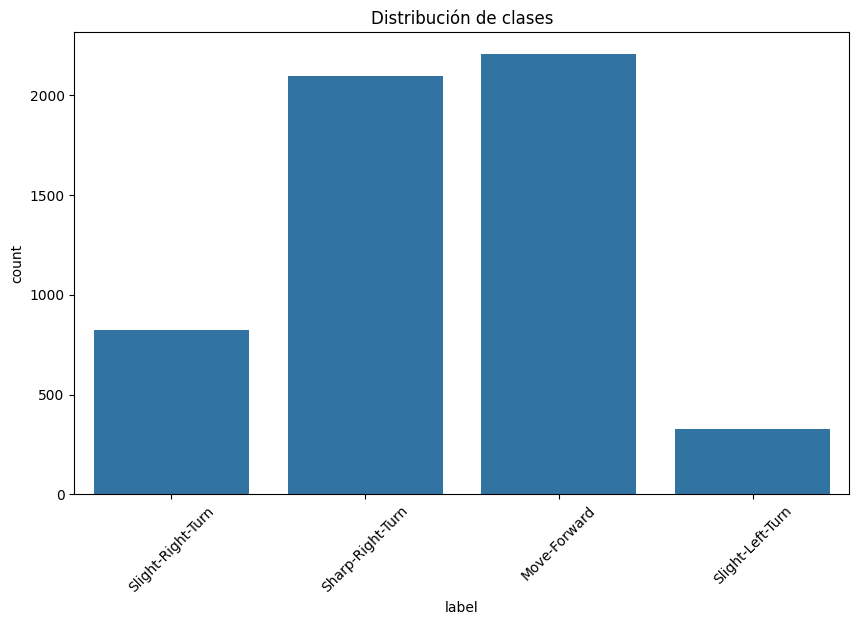

Accuracy: 0.9053145998778253

Classification Report:
                    precision    recall  f1-score   support

     Move-Forward       0.88      0.92      0.90       671
 Sharp-Right-Turn       0.94      0.92      0.93       620
 Slight-Left-Turn       0.92      0.87      0.89        92
Slight-Right-Turn       0.88      0.83      0.86       254

         accuracy                           0.91      1637
        macro avg       0.91      0.89      0.90      1637
     weighted avg       0.91      0.91      0.91      1637



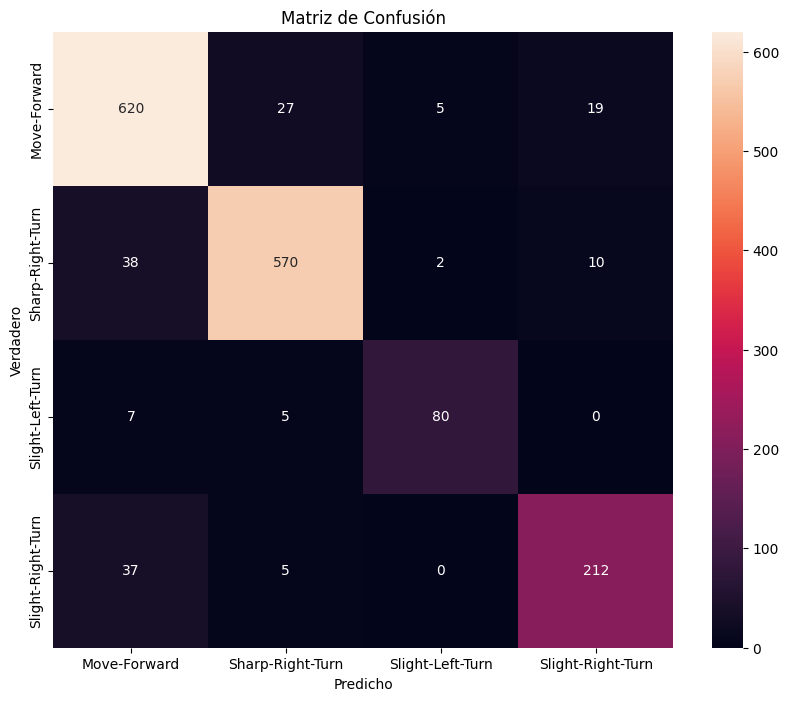

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('sensor_readings_24.csv', header=None)
df.columns = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
              's10', 's11', 's12', 's13', 's14', 's15', 's16',
              's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 'label']

# Visualizar la distribución de clases
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title('Distribución de clases')
plt.xticks(rotation=45)
plt.show()

# Preprocesamiento
X = df.drop('label', axis=1)
y = df['label']

# Codificar las etiquetas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu',
                    solver='adam', random_state=42, early_stopping=True)

mlp.fit(X_train_scaled, y_train)

# Evaluación
y_pred = mlp.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

In [5]:
import librosa
import librosa.display
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# Función para extraer características MFCC
def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print("Error al procesar el archivo:", file_path, str(e))
        return None
    return mfccs_processed

# Cargar datos (asumiendo una estructura de directorios específica)
features = []
labels = []

# Ejemplo de estructura: dataset/0/archivo1.wav, dataset/1/archivo2.wav, etc.
for digit in range(10):
    digit_path = f'dataset/{digit}'
    for filename in os.listdir(digit_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(digit_path, filename)
            data = extract_features(file_path)
            if data is not None:
                features.append(data)
                labels.append(digit)

# Convertir a arrays numpy
X = np.array(features)
y = np.array(labels)

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el MLP
mlp_audio = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500,
                         activation='relu', solver='adam',
                         early_stopping=True, random_state=42)

mlp_audio.fit(X_train_scaled, y_train)

# Evaluación
y_pred = mlp_audio.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizar una forma de onda y MFCCs
plt.figure(figsize=(12, 6))

# Ejemplo: primera muestra del dataset
audio_path = f'dataset/{y[0]}/{os.listdir(f"dataset/{y[0]}")[0]}'
audio, sr = librosa.load(audio_path)

plt.subplot(1, 2, 1)
librosa.display.waveshow(audio, sr=sr)
plt.title('Forma de onda del audio')

plt.subplot(1, 2, 2)
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/0'